# Purpose
Purpose of the notebook is to demonstrate the soft constraint that can be incorporated into support vector machines when the classes to be predicted are not linearly separable. It tends to be used in most real world scenarios as the classes are not linearly separable. 

First, we will formulate the constraint and update the objective to cut some slack. Then, we will find the solution through optimisation. Then, we will develop intuitions on how the algorithm performs using the maths basics developed so far. Then, we will derive hinge loss and view the support vector machine through empirical risk minimisation framework. In the final section, we will use code to test out all the concepts developed in the notebook.


# Table Of Contents
1. Mathematical Formulation
2. Optimisation
3. Insights from Optimisation
4. Derive Hinge Loss
5. Code Walkthrough

# 1. Mathematical Formulation
#### Let's derive the soft constraint

In support vector classifiers With the hard constraint, we maximise the width of the hyperplane $\frac{2}{\lVert{w}\rVert}$. This is same as minimising L2 norm of w. $\frac{\lVert{w}\rVert}{2}^2$.

What happens if the points are not linearly separable? Consider diagram below, there are some blue points mixed up with red points and it is not possible to draw a line separating the two set of points
<img src="./img/02_slack_demo.png" width="400">

Solution is to relax the rule when it is too hard to follow the constraint. Allow some wiggle room to break the rules, but put some controls on the amount of violations allowed. Wiggle room allowed can be denoted by  a positive slack variable $\xi_i, i=1, 2, 3..l$ in the constraints where $l$ is the number of training examples. 

<img src="./img/02_slack_demo_notation.png" width="400">

Note, slack is the distance from support vector plane to the individual points. It is not the distance from the decision boundary(median of the hyperplane). In the above diagram, yellow line denotes the support vector for the blue dots. Hence, slack is the distance from the yellow line to the blue dots that are erraneously in the red side.

1. $ \xi_i = 0$ means we have correctly classified the point.
2. $ 0 < \xi_i < 1 $ means we have correctly classified the point, but point lies betweeen decision bounday and support vector margin
3. $ \xi_i > 1$ means we have misclassified the point

With the slack variable, updated constraints becomes:

$$x_i.w + b \ge +1 - \xi_i \text{for} y_i = +1 $$
$$x_i.w + b \le -1 + \xi_i \text{for} y_i = -1 $$
$$x_i.w + b \le -1( 1 - \xi_i) \text{for} y_i = -1 $$
$$ \xi_i \ge 0 \text{ for every i} $$

Decision rule $y_i(\vec{w}x_i + b) \ge 1 $ can be rewritten as $$y_i(\vec{w}x_i + b) \ge 1 - \xi_i$$ such that $\sum \xi_i$ is as small as possible.

Slacking is allowed only when necessary. If that is not the case, every margin will be infinitely large with maximum slacking possible. To make sure slacking is controlled, we need to modify the original minimisation objective to incorporate minimising the $\sum \xi_i$. So, the new objective function to minimise is
$$\frac{\lVert{w}\rVert^2}{2} + C \sum \xi_i $$ C is the hyperparameter that pays for the losses. 

This can be extended into L1 loss and L2 loss as: 

$$\textrm{L1 Loss:} \frac{\lVert{w}\rVert^2}{2} + C \sum \xi_i $$
 
$$\textrm{L2 Loss:} \frac{\lVert{w}\rVert^2}{2} + C \sum (\xi_i)^2 $$


# 2. Optimisation


Our objective function is $$\frac{\lVert{w}\rVert^2}{2} + C \sum \xi_i $$

Constraints  formulated are:
$$y_i(\vec{w}x_i + b) \ge 1 - \xi_i$$
$$ \xi_i \ge 0 \text{ for every i} $$

To maximise or minimise the objective with inequality constraints, we use [Karush-Kuhn-Tucker conditions](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions) to solve for the optimisation problem. Approach involves formulating a lagragian primal problem and checking the various KKT conditions listed below.

To formulate the lagrangian primal problem, we combine the constraints listed above by introducing lagrangian multipliers $\alpha$ and $\mu$

Langrangian primal problem  is 
<img src="./img/notebook2/equation_1.png" width=600>
where $\mu_i$ and $\alpha_i$ are the Lagrangian multipliers introduced.

In the below equations, i runs from 1 to the number of training points, and $v$ runs from 1 to dimension of data.
From stationarity conditions from KKT, we will differentiate w.r.t changing variables and assign them to 0:
For detailed derivation of below two equations, please refer to [01_SVM_Foundational_Maths notebook](./01_SVM_Foundational_Maths.ipynb).
<img src="./img/notebook2/equation_2.png" width=400>

<img src="./img/notebook2/equation_3.png" width=300>

In addition, there is one more variable $\xi$
$$ \frac{\partial{L_p}}{\partial{\xi_i}} = C - \alpha_i - \mu_i = 0 \cdots\cdots equation_4$$

From dual feasibility conditions from KKT:
$$ y_i (x_i.w + b)- 1 + \xi_i \ge 0 \longrightarrow equation_5$$
$$ \xi_i \ge 0 \cdots\cdots equation_6$$
$$ \alpha_i \ge 0 \cdots\cdots equation_7$$
$$ \mu_i \ge 0 \cdots\cdots equation_8$$

From complementary slackness conditions from KKT:

$$\alpha_i \{y_i (x_i.w + b)- 1 + \xi_i\} = 0 \cdots\cdots equation_9$$
$$\mu_i \xi_i = 0 \cdots\cdots equation_{10}$$




### Deriving intuitions on solution, $\alpha$ and $C$

#### For points on the wrong side of support vector margin
Combining equations 4, 7 and 10 

$$ \frac{\partial{L_p}}{\partial{\xi_i}} = C - \alpha_i - \mu_i = 0 \cdots\cdots equation_4$$
$$ \alpha_i \ge 0 \cdots\cdots equation_7$$
$$\mu_i \xi_i = 0 \cdots\cdots equation_{10}$$

From $equation_{4}$ $$\mu_i = C - \alpha_i$$
Substituting $\mu_i$ into $equation_{10}$
$$ (C - \alpha_i) \xi_i = 0 $$

$$ \alpha_i \ge 0 \cdots\cdots equation_7$$

So, from $equation_7$ and $equation_10$ we have got: 
$$ (C - \alpha_i) \xi_i = 0 and \alpha_i \gt 0 $$

Consider points where $(x_i.w + b)< 1$. For such points, we know the slack variable is allowed. 
$$ \xi_i \neq 0 then C = \alpha_i $$


Conversely, consider $ \alpha_i = C $
$$\alpha_i \{y_i (x_i.w + b)- 1 + \xi_i\} = 0 \cdots\cdots equation_9$$
$$\{y_i (x_i.w + b)- 1 + \xi_i\} = 0$$
$$y_i(x_i.w + b) = 1 - \xi_i$$
$$y_i(x_i.w + b) \le 1$$

In the code below, printing out $\alpha_i$(dual_coef in sklearn construct) for different C, it can be observed that for some points $C=\alpha_i$. We can then infer that those points are the ones where slack variable is allowed (i.e, points are either on the wrong side of the hyperplane or points are between the dividing hyperplane and support vector margin)

$$ \alpha_i < C then \xi_i=0 $$

#### For points on the correct side of support vector margin
From complementary slackness conditions from KKT:

$$\alpha_i \{y_i (x_i.w + b)- 1 + \xi_i\} = 0 \cdots\cdots equation_9$$
For the points that are correctly classified 
$y_i (x_i.w + b) > 1$. 
$y_i (x_i.w + b)- 1$ is greater than 0. So, $\alpha_i$ is 0, for points that lie on the correct side of the hyperplane. This leads to the sparsity of the solution.





[Reference](https://www.mit.edu/~9.520/spring12/slides/class06/class06_RLSSVM.pdf)

# 3. Insights from Optimisation: 
* $\xi_i$ is the distance from the gutter of the hyperplane and not the decision boundary

* C is the cost of slacking the algorithm adopts. For small values of C, cost of slacking is small. Therefore, more misclassification is allowed to achieve the objective of maximising margin and obtaining a large margin. If C is very high, the algorithm needs to pay a lot for the mistakes, so width of the hyperplane tends to be narrower. When C is high, cost of slacking is high, margin is smaller.

* When the points are in the same side of the decision boundary, but within the gutters, there is still a price to pay. This is the situation where $ 0 < \xi_i < 1 $

* Misclassified points are also part of the support vectors

* $\alpha$ is box constrained between 0 and C

* Most important data points are the support vectors with the highest values of alpha

* For the non separable case, upper bound of alpha on C puts a maximum limit on the influence any point can have on the final outcome.

* Because C is dependant on the number of training examples, there is a strategy to evaluate scaling of C with the number of training examples. This [sklearn documentation](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_scale_c.html) provides the details.How do we optimally adjust C to account for the different amount of training samples?
We can scale C to compensate for the change in the number of samples, in the case of using an l1 penalty, as well as the l2 penalty. In the l1 case, theory says that prediction consistency (i.e. that under given hypothesis, the estimator learned predicts as well as a model knowing the true distribution) is not possible because of the bias of the l1. It does say, however, that model consistency, in terms of finding the right set of non-zero parameters as well as their signs, can be achieved by scaling C1

# 4. Formulating as Hinge Loss

Since, we have overall objective of minimising $\xi_i$, if the point is classified perfectly without the need for slack variable $\xi_i$, the algorithm needs to do that. So, $\xi_i = 0$ for those cases.This can be formalised as $$\xi_i = 0 \textrm{if} y_i(\vec{w}x_i + b) >= 1$$

For other cases, slack variable $\xi_i$ is set as the distance from the separating gutter.i.e if $y_i(\vec{w}x_i + b)<1$ $$ \xi_i = 1 - y_i(\vec{w}x_i + b) $$ 

Both the conditions above can be combined to obtain the following 

$$ \xi_i = max (0 , 1-y_i(\vec{w}x_i + b)$$

Objective function to minimise - $$\frac{\lVert{w}\rVert^2}{2} + \sum \xi_i $$

can be upgraded as $$\frac{\lVert{w}\rVert^2}{2} + C* \sum max (0 , 1-y_i(\vec{w}x_i + b)$$

### SVM Hinge Loss insights

Objective function to minimise in SVM is: 
$$\frac{\lVert{w}\rVert^2}{2} + C* \sum max (0 , 1-y_i(\vec{w}x_i + b)$$

The component $\sum max (0 , 1-y_i(\vec{w}x_i + b)$ looks at the loss coming from each training sample. So, this is the loss function.

The component $\frac{\lVert{w}\rVert^2}{2}$ is the component that keeps the solution simple. Minimal weights needed for the hyperplane. This is the regularization function.

Multiplying the equation through by $\frac{1}{2C n}$
$$\frac{1}{2C n} \frac{\lVert{w}\rVert^2}{2} + 1/2n * \sum max (0 , 1-y_i(\vec{w}x_i + b)$$
So, combined the objective function can be rewitten as Loss function + $\lambda$* Regularization function.

$C$ = $\frac{1}{2\lambda n}$

$\lambda = \frac{1}{2C n}$
This also confirms the intuition how large values of C leads to less regularization.


# 5. Code Walkthrough
#### 5.1 Generate train data

In [1]:
import random

import pandas as pd
import numpy as np

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

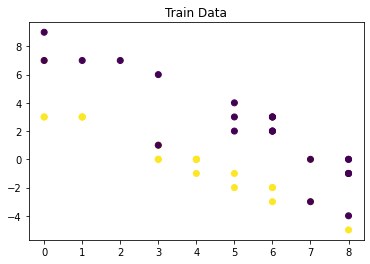

In [2]:
def ymxb(slope, intercept, x):
    return slope * x + intercept

def generate_linear_points(num_points, slope, line1_intercept, line2_intercept):
    x1 = [random.randrange(start=0, stop=9) for i in range(num_points)]
    x2 = [random.randrange(start=0, stop=9) for i in range(num_points)]
    y1 = [ymxb(slope, line1_intercept, x) - random.randrange(start=1, stop=3) for x in x1]
    y2 = [ymxb(slope, line2_intercept, x) + random.randrange(start=1, stop=4) for x in x2]
    return np.c_[x1, y1], np.c_[x2, y2]

num_points_correct = 20
X_pos, X_neg = generate_linear_points(num_points_correct, -1, 5, 6)

# Generate mistaken points
num_points_misclass = 3
x_pos, x_neg = generate_linear_points(num_points_misclass, -1, 5, 6)

# concatenate the 2 lists that are returned by the function, to pass in a single function
X_pos = np.vstack([X_pos,x_neg])
X_neg  = np.vstack([X_neg, x_pos])

# Concatenate the 2 together
X = np.vstack([X_pos, X_neg])
y = np.hstack([np.ones(num_points_correct + num_points_misclass ).T, 
               np.ones(num_points_correct + num_points_misclass).T *-1])
plt.title("Train Data")
plt.scatter(X[:, 0], X[:, 1], c = y)

#### 5.2 Generate test data

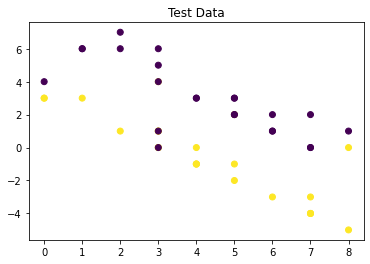

In [3]:
num_points_correct = 20
X_pos_test, X_neg_test = generate_linear_points(num_points_correct, -1, 5, 6)

# Generate mistaken points
num_points_misclass = 3
x_pos_test, x_neg_test = generate_linear_points(num_points_misclass, -1, 5, 6)

# concatenate the 2 lists that are returned by the function, to pass in a single function
X_pos_test = np.vstack([X_pos_test,x_neg_test])
X_neg_test  = np.vstack([X_neg_test, x_pos_test])

# Concatenate the 2 together
X_test = np.vstack([X_pos_test, X_neg_test])
y_test = np.hstack([np.ones(num_points_correct + num_points_misclass ).T, 
               np.ones(num_points_correct + num_points_misclass).T * -1])

plt.title("Test Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test)

#### 5.3 Hyperparameter Search C
Perform GridSearchCV across a lost of values of C for the linear kernel.

In [4]:

parameters = {'C':[0.01, 0.1, 1, 10], 
              'kernel': ['linear']}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X, y)
df_results = pd.DataFrame(clf.cv_results_)
print(df_results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.002798      0.002398         0.001202    4.008613e-04    0.01   
1       0.002000      0.002000         0.001000    7.629395e-07     0.1   
2       0.002000      0.001550         0.000601    4.903694e-04       1   
3       0.001802      0.000751         0.000798    3.989831e-04      10   

  param_kernel                           params  split0_test_score  \
0       linear  {'C': 0.01, 'kernel': 'linear'}                1.0   
1       linear   {'C': 0.1, 'kernel': 'linear'}                1.0   
2       linear     {'C': 1, 'kernel': 'linear'}                1.0   
3       linear    {'C': 10, 'kernel': 'linear'}                1.0   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                1.0                1.0                1.0           0.333333   
1                1.0                1.0                1.0           0.333333   
2                1.0          

To understand the behaviour of the hyperplanes, let us plot the hyperplanes

#### 5.4 Plot Hyperplane

Decision rule : $$ y = \vec{w}\vec{x} + b $$
for positive support vector decision boundary $$ \vec{w}\vec{x} + b = 1 $$
for negative support vector decision boundary $$ \vec{w}\vec{x} + b = -1  $$
for decision boundary $$ \vec{w}\vec{x} + b = 0  $$

To draw the hyperplane, for a given point x, we need the corresponding y. So, consider $\vec{x}$ as $x_i$, $y_i$. $\vec{w}$ has 2 points $w_0$ and $w_1$.

Let v be the value to be subtituted. Rewriting equation above,

$$ v = w_0.x_i + w_1.y_i + b $$
$$ y_i = \frac{v - w_0.x_i - b}{w_1} $$



In [5]:
# Reference : https://pythonprogramming.net/predictions-svm-machine-learning-tutorial/
def hyperplane(x,w,b,v):
    # v = (w.x+b)
    return (-w[0]*x-b+v) / w[1]

In [6]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Check sum of alphas across both classes
1.734723475976807e-17
number of dimensions 2 2
length support vectors 45
support vectors [[ 8. -1.]
 [ 6.  3.]
 [ 6.  2.]
 [ 6.  3.]
 [ 8.  0.]
 [ 5.  3.]
 [ 8. -1.]
 [ 5.  2.]
 [ 7.  0.]
 [ 1.  7.]
 [ 6.  2.]
 [ 5.  4.]
 [ 3.  6.]
 [ 8.  0.]
 [ 6.  3.]
 [ 8. -1.]
 [ 6.  2.]
 [ 0.  9.]
 [ 0.  7.]
 [ 2.  7.]
 [ 3.  1.]
 [ 8. -4.]
 [ 7. -3.]
 [ 7. -3.]
 [ 5. -2.]
 [ 8. -5.]
 [ 6. -3.]
 [ 3.  1.]
 [ 3.  1.]
 [ 0.  3.]
 [ 1.  3.]
 [ 1.  3.]
 [ 4.  0.]
 [ 1.  3.]
 [ 5. -1.]
 [ 6. -2.]
 [ 6. -2.]
 [ 4.  0.]
 [ 3.  0.]
 [ 3.  0.]
 [ 4.  0.]
 [ 0.  3.]
 [ 0.  7.]
 [ 6.  3.]
 [ 7.  0.]]
length dual coefficient 45
dual coefficient [[-0.01       -0.00344444 -0.01       -0.01       -0.01       -0.01
  -0.01       -0.01       -0.01       -0.01       -0.01       -0.00044444
  -0.00722222 -0.01       -0.01       -0.01       -0.01       -0.01
  -0.01       -0.01       -0.01       -0.01       -0.01        0.01
   0.01        0.00757778  0.01        0.01        0.

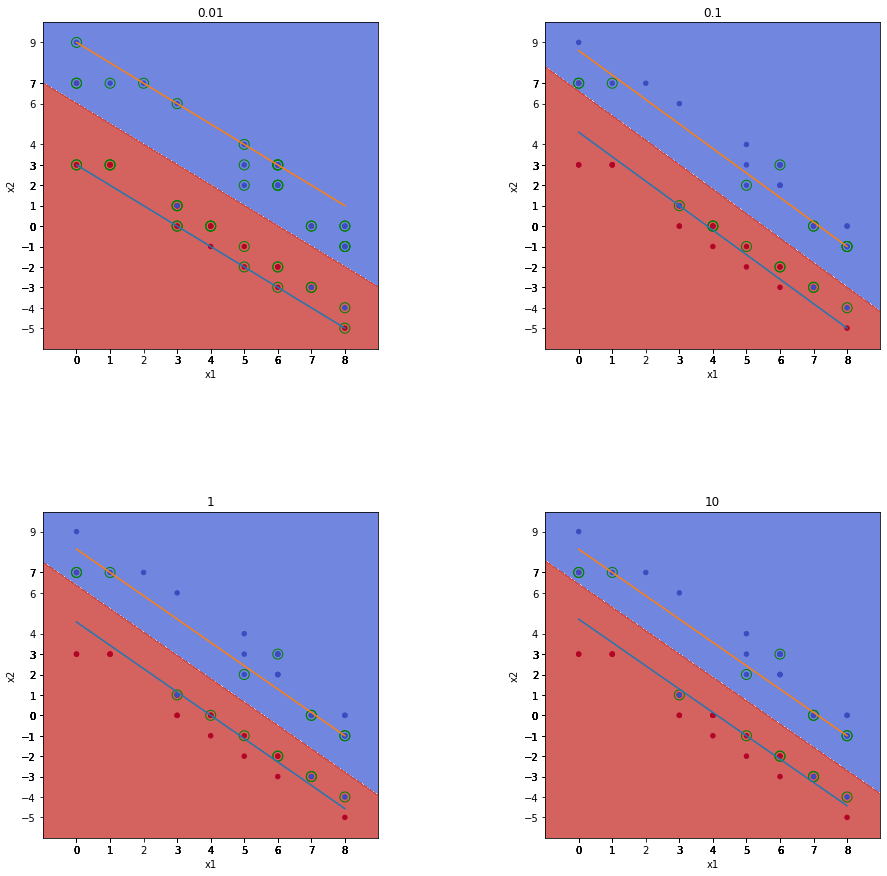

In [7]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=.5, hspace=.5)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for param, ax in zip(parameters['C'], sub.flatten()):
    clf = svm.SVC(kernel = 'linear', C = param)
    clf.fit(X,y)
    title = param
    
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xticks(X0)
    ax.set_yticks(X1)
    ax.set_title(title)
    
    x_line = np.linspace(0,8,9)
    psv1 = hyperplane(min(x_line),clf.coef_[0],clf.intercept_,1)
    psv2 = hyperplane(max(x_line),clf.coef_[0],clf.intercept_,1)
    ax.plot([min(x_line),max(x_line)], [psv1, psv2])

    nsv1 = hyperplane(min(x_line),clf.coef_[0],clf.intercept_,-1)
    nsv2 = hyperplane(max(x_line),clf.coef_[0],clf.intercept_,-1)
    ax.plot([min(x_line),max(x_line)], [nsv1, nsv2])
    
    # Theoretically dual coefficients should balance out between positive and negative classes
    print('Check sum of alphas across both classes')
    print(np.sum(clf.dual_coef_[0]))
    
    # Derive weights from alphas
    # Matches as this is how sklearn populates the attribute
    print('number of dimensions', clf.support_vectors_.ndim, clf.dual_coef_.ndim)
    print('length support vectors', len(clf.support_vectors_))
    print('support vectors', clf.support_vectors_)
    print('length dual coefficient', len(clf.dual_coef_[0]))
    print('dual coefficient', clf.dual_coef_)
    
    # When both dimensions are less than or equal to 2 , 
    # it is matrix multiplication
#     print('Recreating coefficients')
#     print(clf.dual_coef_ @ clf.support_vectors_)
    
#     print('Checking how close the coefficients are:')
#     print(np.allclose(clf.coef_ , clf.dual_coef_  @ clf.support_vectors_))
    
    print('support vectors')
    print(clf.support_vectors_)

    ax.scatter(clf.support_vectors_[:, 0], 
               clf.support_vectors_[:, 1], 
               s=100,          
               linewidth=1, 
               facecolors='none', 
               edgecolors='green')

plt.show()
    

### 5.5 Insights regarding C:
    
For C=.01, margin width is very  high. A lot of points are categorized as support vectors. Regularisation is inversely proportional to the value of C. Hence, this classifier is the least regularized classifier.
<img src="./img/notebook2/c01.png" width=400>


For C= .1, margin width is lower than C = .01. Both gutters have moved by one line.
<img src="./img/notebook2/cpoint1.png" width=400>

For C=1 and C=10, the margins move slightly closer.
<img src="./img/notebook2/c1.png" width=400>

<img src="./img/notebook2/c10.png" width=400>

### 5.5 Insights regarding Alpha:

***For C=.01***
For C=.01, almost all of the points(45 out of 46 points) are flagged as support vectors, due to the large margin. Of those points, some of them have $\alpha = .01 (C) $ and others are $\alpha < .01$. $\alpha$ values are returned by dual coefficients.

<img src="./img/notebook2/support_vec_c_01.png"  width=400>

<img src="./img/notebook2/alpha_point01.png" width=400>

Mapping it on to the visualisation, the points with $\alpha < .01 (C) $ lie on the support vector margin.
<img src="./img/notebook2/c01_nonzero_alpha.png" width=400>

Dual coefficients for all support vectors are with value of C = .01
<img src="./img/notebook2/alpha_point1.png" width=600>


### 5.6 General Insights:

Misclassified points because of soft margin are also included in the support vectors. 

Alpha (dual_coef_ from SVC) already has target incorporated into it. So sum of alphas add up to 0 as per the equation $\sum \alpha_i y_i = 0 $.

In the code above, printing out  𝛼𝑖 (dual_coef in sklearn construct) for different C, it can be observed that for some points  𝐶=𝛼𝑖 . We can then infer that those points are the ones where slack variable is allowed (i.e, points are either on the wrong side of the hyperplane or points are between the dividing hyperplane and support vector margin)
For C=.01, all 40 points have alpha and they are all at C

It is possible to recreate coef_ from dual_coef_ and support_vectors. Infact, this is how sklearn does it. [Source code reference](https://github.com/scikit-learn/scikit-learn/blob/2beed55847ee70d363bdbfe14ee4401438fba057/sklearn/svm/_base.py#L751) 
$ \vec{w} = \sum \alpha_iy_ix_i $

### Open Questions

It is unclear why point 6,4 is included in the support vectors.

### 5.6 Plot Hinge Loss vs. Squared Hinge Loss 
In the above section on hinge loss, SVM Objective function to minimise  was rewritten as: 
$$\frac{\lVert{w}\rVert^2}{2} + C* \sum max (0 , 1-y_i(\vec{w}x_i + b)$$
$(\vec{w}x_i + b)$ can be derived from decision_function in sklearn

#### Plot Hinge Loss : max(0, 1 - yi*decision_function)

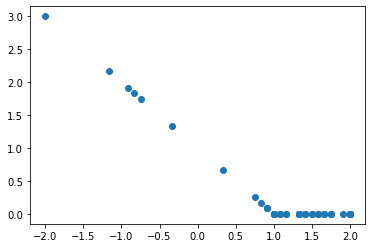

In [8]:
clf = svm.SVC(kernel = 'linear', C = 10)
clf.fit(X,y)
hinge_loss =  np.maximum(0, 1 - y*clf.decision_function(X))
plt.scatter(y*clf.decision_function(X) , hinge_loss)

#### Plot Squared Hinge Loss

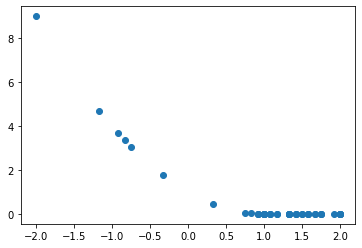

In [9]:
hinge_loss =  np.maximum(0, 1 - y*clf.decision_function(X))
squared_hinge_loss = hinge_loss ** 2
plt.scatter(y*clf.decision_function(X) , squared_hinge_loss )

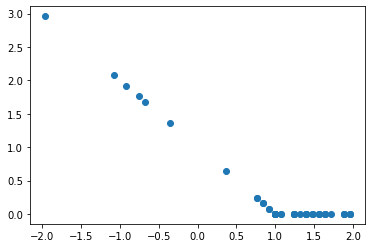

In [10]:
clf = svm.SVC(kernel = 'linear', C = 1)
clf.fit(X,y)
hinge_loss =  np.maximum(0, 1 - y*clf.decision_function(X))
plt.scatter(y*clf.decision_function(X) , hinge_loss)


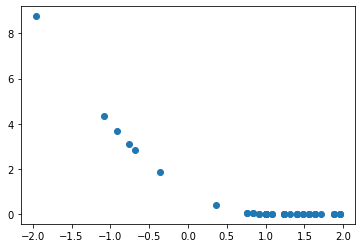

In [11]:
squared_hinge_loss = hinge_loss ** 2
plt.scatter(y*clf.decision_function(X) , squared_hinge_loss )

# References:
* Many thanks to https://github.com/jazzapple for reviewing the notebook and providing feedback.
* A tutorial on Support Vector Machines for Pattern Recognition by Christopher J Burges
* [Cornell Machine Learning Lecture](http://www.cs.cornell.edu/courses/cs4780/2018sp/page16/).
